In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("UberDataset.csv")

In [3]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [4]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [5]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [7]:
df['PURPOSE'] = df['PURPOSE'].fillna("UNKNOWN")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     1156 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [9]:
df.dropna(inplace = True)

In [12]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [13]:
df['START_DATE']

0       01-01-2016 21:11
1       01-02-2016 01:25
2       01-02-2016 20:25
3       01-05-2016 17:31
4       01-06-2016 14:42
              ...       
1150     12/31/2016 1:07
1151    12/31/2016 13:24
1152    12/31/2016 15:03
1153    12/31/2016 21:32
1154    12/31/2016 22:08
Name: START_DATE, Length: 1155, dtype: object

In [14]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'])

In [15]:
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

In [16]:
df['START_DATE']

0      2016-01-01 21:11:00
1      2016-01-02 01:25:00
2      2016-01-02 20:25:00
3      2016-01-05 17:31:00
4      2016-01-06 14:42:00
               ...        
1150   2016-12-31 01:07:00
1151   2016-12-31 13:24:00
1152   2016-12-31 15:03:00
1153   2016-12-31 21:32:00
1154   2016-12-31 22:08:00
Name: START_DATE, Length: 1155, dtype: datetime64[ns]

In [17]:
df['DURATION'] = (df['END_DATE'] - df['START_DATE'])/np.timedelta64(1, 'm')

In [18]:
df['DURATION']

0         6.0
1        12.0
2        13.0
3        14.0
4        67.0
        ...  
1150      7.0
1151     18.0
1152     35.0
1153     18.0
1154    103.0
Name: DURATION, Length: 1155, dtype: float64

In [20]:
df.describe()

,MILES,DURATION
count,1155.000000,1155.000000
mean,10.566840,23.243290
std,21.579106,27.318277
min,0.500000,0.000000
25%,2.900000,10.000000
50%,6.000000,16.000000
75%,10.400000,27.500000
max,310.300000,336.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
 7   DURATION    1155 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 81.2+ KB


In [24]:
df['CATEGORY'] = df['CATEGORY'].astype('category')

([<matplotlib.patches.Wedge at 0x239a52864f0>,
 [Text(-1.0759623636622138, 0.22870284646768646, 'Business'),
  Text(1.0759623690153899, -0.22870282128297006, 'Personal')],
 [Text(-0.5868885619975711, 0.1247470071641926, '93.3%'),
  Text(0.5868885649174853, -0.12474699342707457, '6.7%')])

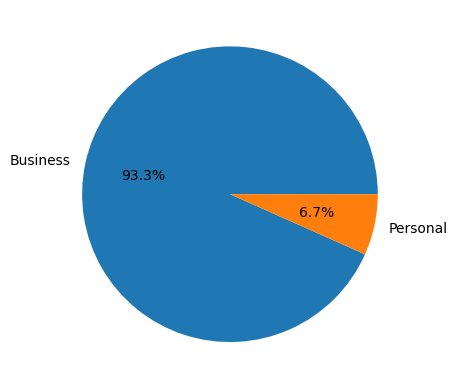

In [29]:
categorical = df['CATEGORY'].value_counts()
plt.pie(categorical, labels = categorical.index, autopct = "%1.1f%%")

We can say that most of the Uber rides during 2016 have been for Business purpose.

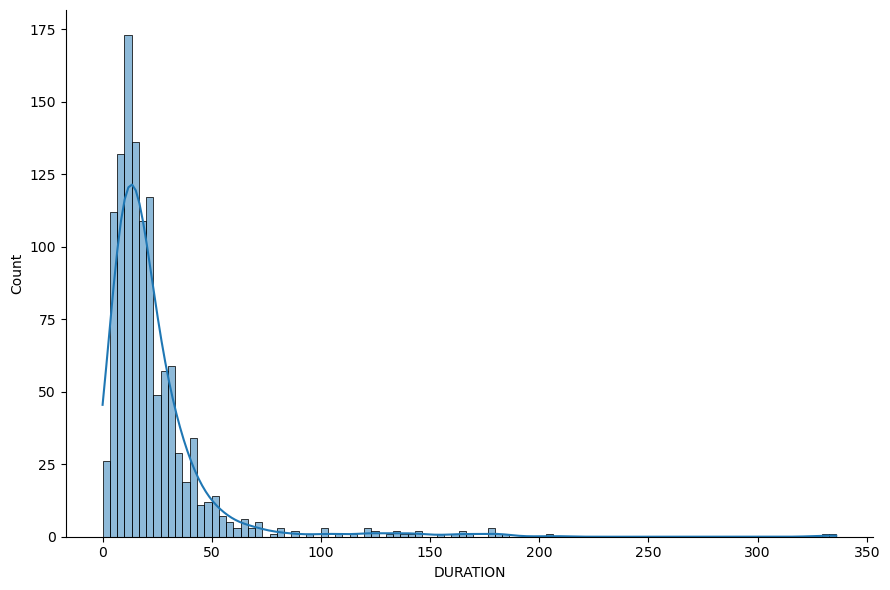

In [31]:
sns.displot(x = 'DURATION', data = df, aspect = 1.5, height = 6, kde=True)

<AxesSubplot:xlabel='index', ylabel='START'>

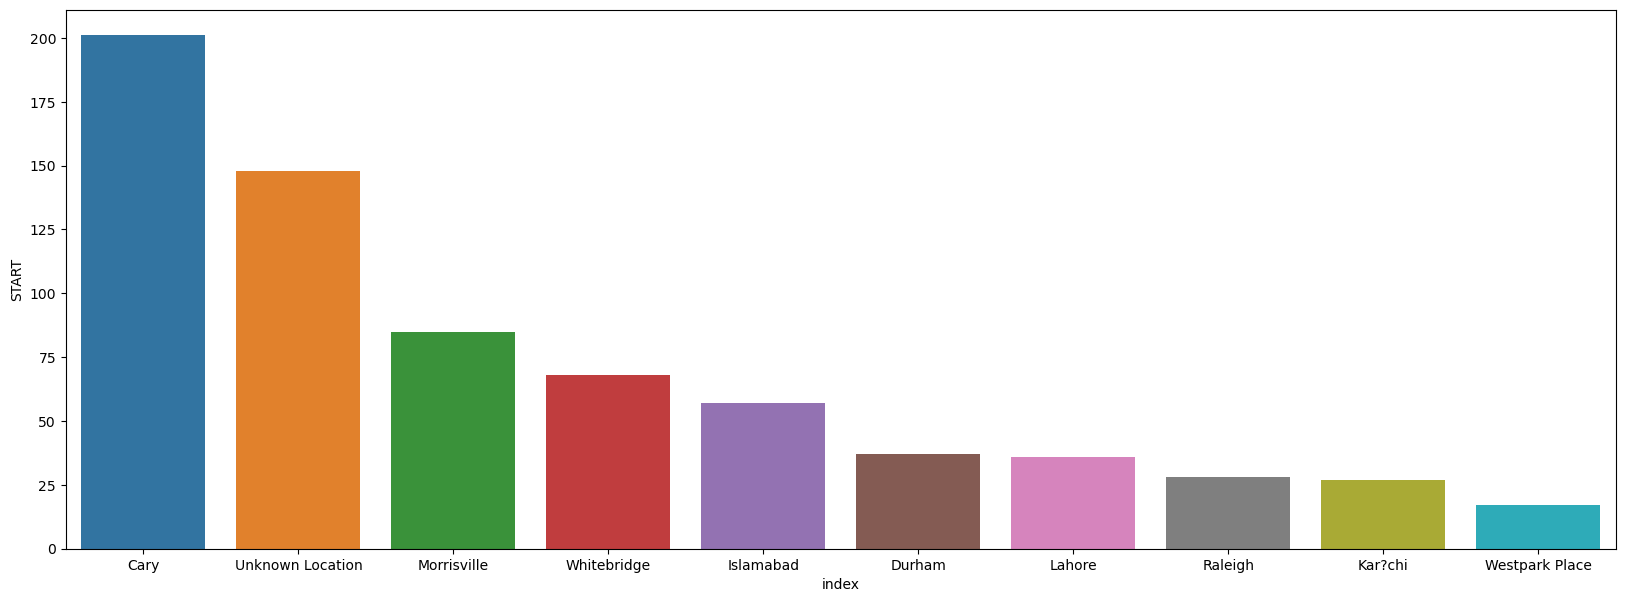

In [45]:
plt.figure(figsize=(20,7))
temp = df['START'].value_counts().nlargest(10).reset_index()
sns.barplot(data = temp, x = 'index', y = 'START')

<AxesSubplot:title={'center':'TOP 10 STOP Locations'}, xlabel='index', ylabel='STOP'>

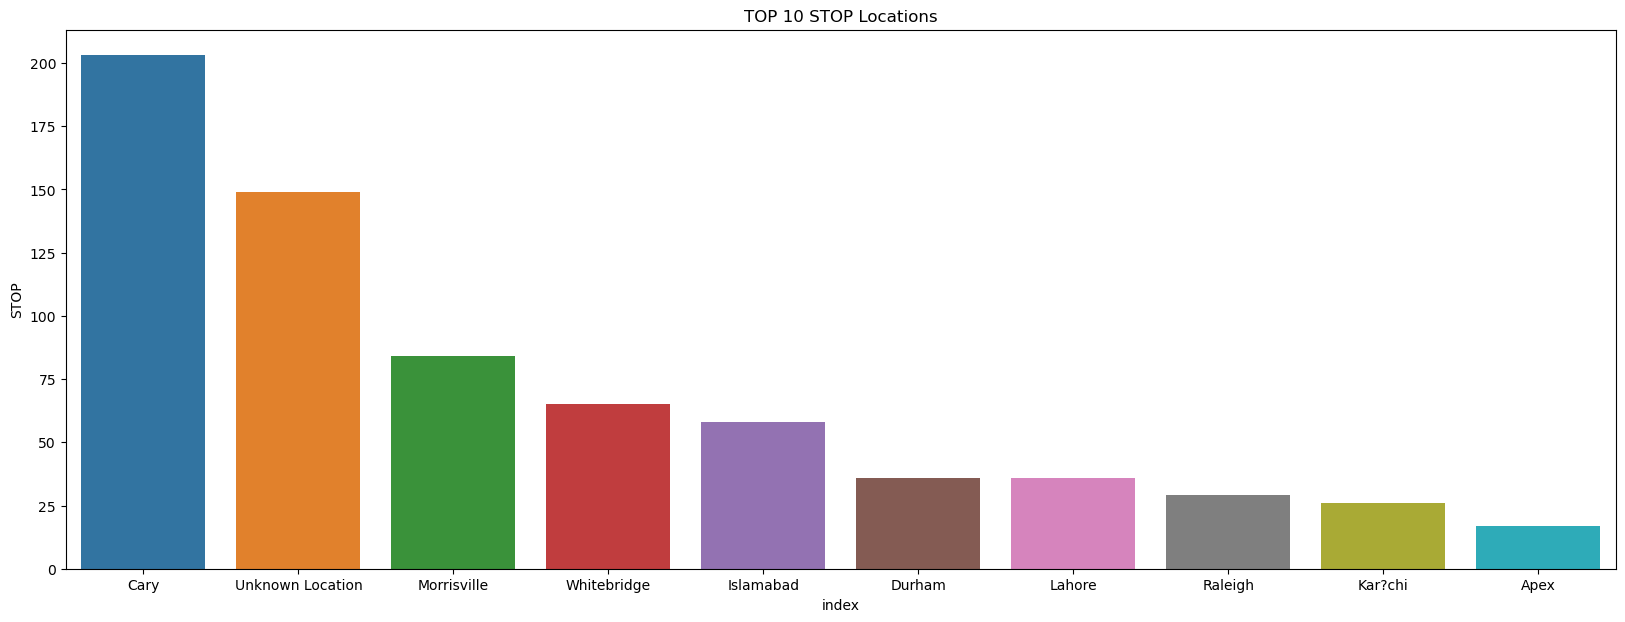

In [50]:
plt.figure(figsize=(20,7))
temp1 = df['STOP'].value_counts().nlargest(10).reset_index()
plt.title('TOP 10 STOP Locations')
plt.xlabel('STOP Locations')
sns.barplot(data = temp1, x = 'index', y = 'STOP')

In [51]:
purpose = df['PURPOSE'].value_counts()

<BarContainer object of 2 artists>

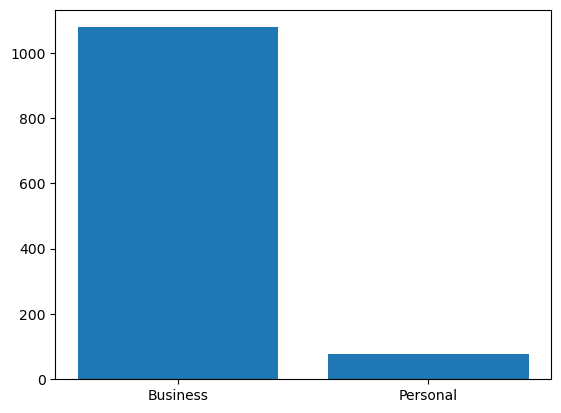

In [58]:
cat_count = df['CATEGORY'].value_counts()
plt.bar(cat_count.index,cat_count.values)

In [59]:
purpose = df.groupby("PURPOSE").size().reset_index()
purpose.rename(columns={0:"Trips"},inplace=True)
purpose.sort_values(by='Trips',ascending=False,inplace=True)
purpose

,PURPOSE,Trips
10,UNKNOWN,502
7,Meeting,187
6,Meal/Entertain,160
5,Errand/Supplies,128
4,Customer Visit,101
9,Temporary Site,50
1,Between Offices,18
8,Moving,4
0,Airport/Travel,3
2,Charity ($),1


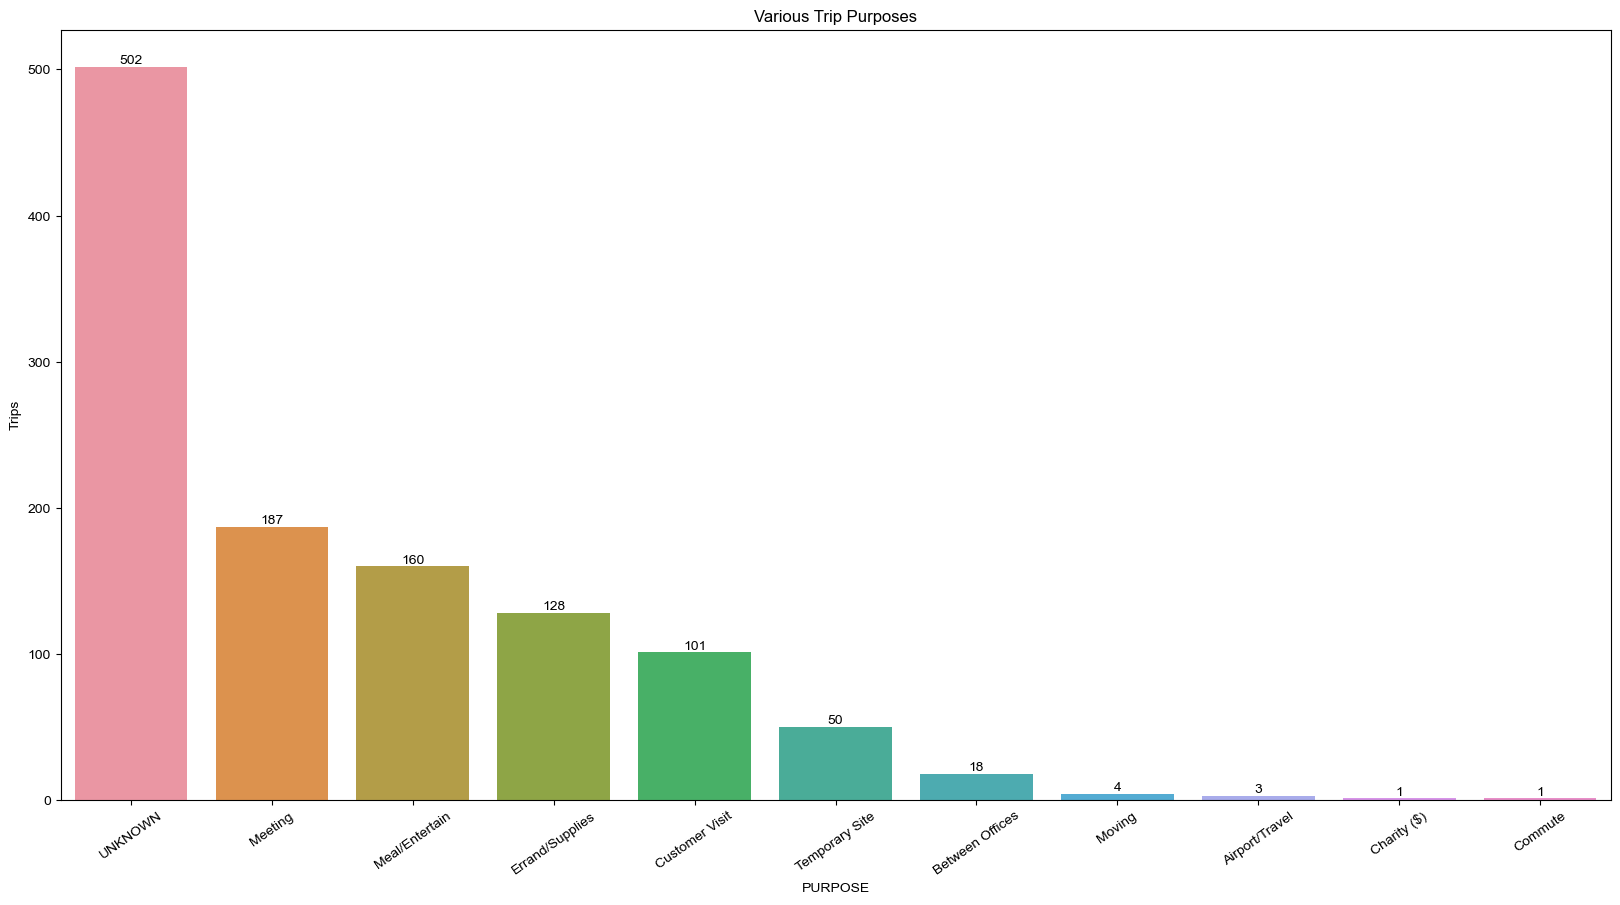

In [62]:
plt.rcParams['figure.figsize'] = (20,10)
p = sns.barplot(x='PURPOSE',y='Trips',data = purpose)
p.bar_label(p.containers[0])
plt.title("Various Trip Purposes")
p.set_xticklabels(labels=purpose["PURPOSE"], rotation=35)
sns.set(font_scale=1.25)
plt.show()